In [34]:
using ScikitLearn.CrossValidation 
using Plots 
using Statistics
using PyCall 
using DataFrames 
using GLM  # Generalized Linear Models in Julia 
using CSV

## Data preparation

In [51]:
dataset = CSV.read("data/real-state.csv");
typeof(dataset)

DataFrame

In [52]:
describe(dataset)

,variable,mean,min,median,max,nunique
,Symbol,Float64,Real,Float64,Real,Nothing
1,No,207.5,1,207.5,414,
2,X1 transaction date,2013.15,2012.67,2013.17,2013.58,
3,X2 house age,17.7126,0.0,16.1,43.8,
4,X3 distance to the nearest MRT station,1083.89,23.3828,492.231,6488.02,
5,X4 number of convenience stores,4.0942,0,4.0,10,
6,X5 latitude,24.969,24.9321,24.9711,25.0146,
7,X6 longitude,121.533,121.474,121.539,121.566,
8,Y house price of unit area,37.9802,7.6,38.45,117.5,


In [53]:
X = Matrix(dataset[:,[2,3,4,5,6,7]]); # house features
Y = Vector(dataset[:,8]); # house price

In [54]:
size(X)

(414, 6)

In [55]:
size(Y)

(414,)

Since all the features have positive values, I scale the features so that they have the same weigth.

In [65]:
function standarize!(X)
    for col in Array(1:size(X,2))
        X[:,col] = (X[:, col] .- mean(X[:,col])) ./ std(X[:, col])
    end
end

function scale!(X)    
    for col in Array(1:size(X,2))
        minimum = min(X[:,col]...)
        maximum = max(X[:, col]...)
        X[:,col] = (X[:, col] .- minimum) ./ (maximum -minimum)
    end
end

scale! (generic function with 1 method)

In [66]:
scale!(X)

We can plot some of the features vs the house's price

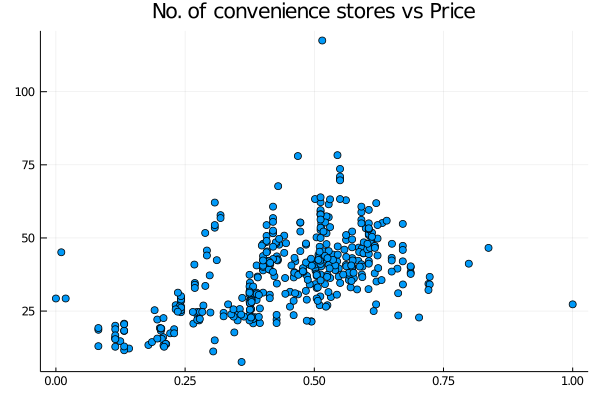

In [68]:
scatter(X[:,5], Y, label=nothing, title="No. of convenience stores vs Price")

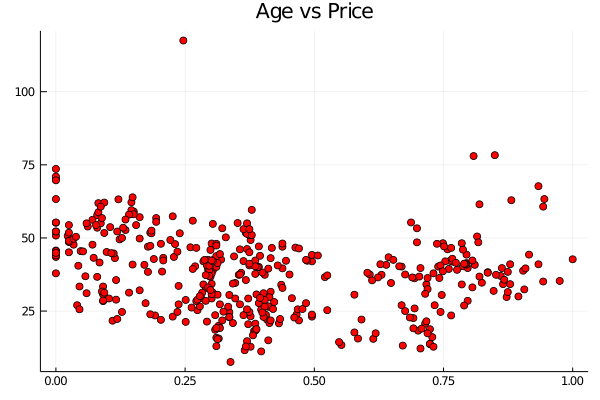

In [69]:
scatter(X[:,2], Y, label=nothing, title="Age vs Price", markercolor=:red)

## Linear Regression

In [73]:
?GLM.lm

```
lm(X, y, allowrankdeficient::Bool=false; wts=similar(y, 0))
```

An alias for `fit(LinearModel, X, y, allowrankdeficient)`

The arguments `X` and `y` can be a `Matrix` and a `Vector` or a `Formula` and a `DataFrame`.

The keyword argument `wts` can be a `Vector` specifying frequency weights for observations.


It is necessary to add a columns of 'ones' so that the LinearModel computes the intercept.

In [ ]:
X1 = hcat(ones(size(X,1)),X) 

In [98]:
model = lm(X1,Y)

LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
────────────────────────────────────────────────────────────────────
     Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────
x1   32.8058      4.32781   7.58022     <1e-12   24.2981    41.3134
x2    4.71394     1.42628   3.30507     0.0010    1.91015    7.51774
x3  -11.8127      1.68764  -6.9995      <1e-10  -15.1302    -8.49508
x4  -29.0098      4.64179  -6.24971     <1e-8   -38.1347   -19.8849
x5   11.3328      1.88164   6.02282     <1e-8     7.63382   15.0317
x6   18.606       3.67764   5.05923     <1e-6    11.3765    25.8356
x7   -1.15216     4.50549  -0.255724    0.7983  -10.0091     7.70478
────────────────────────────────────────────────────────────────────


x1 is the intercept

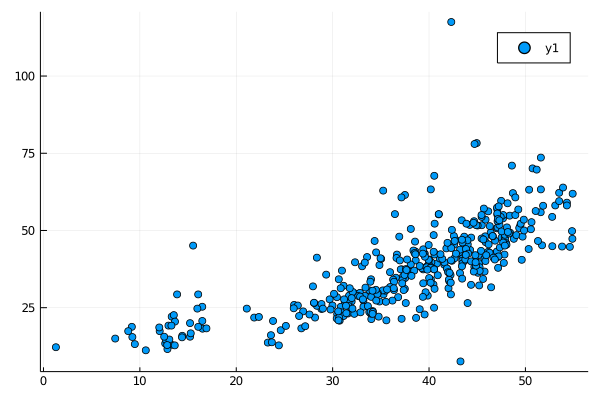

In [106]:
scatter(GLM.predict(model), Y)